<a href="https://colab.research.google.com/github/GVSU-CIS635/gvsu-cis635-term-project-project-lung-cancer/blob/main/Copy_of_LungCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

importing the datasset

In [ ]:
dataset = pd.read_csv("/LungCancer.csv")
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values

Handling the missing data

In [ ]:
dataset.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [ ]:
dataset.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [ ]:
print(X)

[['M' 69 1 ... 2 2 2]
 ['M' 74 2 ... 2 2 2]
 ['F' 59 1 ... 2 1 2]
 ...
 ['M' 58 2 ... 1 1 2]
 ['M' 67 2 ... 2 1 2]
 ['M' 62 1 ... 1 2 1]]


Encoding Categorical data

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
column_transformer = ColumnTransformer(transformers = [('encoder',OneHotEncoder(),[0])] , remainder = 'passthrough')
X = np.array(column_transformer.fit_transform(X))

In [ ]:
print(X)

[[0.0 1.0 69 ... 2 2 2]
 [0.0 1.0 74 ... 2 2 2]
 [1.0 0.0 59 ... 2 1 2]
 ...
 [0.0 1.0 58 ... 1 1 2]
 [0.0 1.0 67 ... 2 1 2]
 [0.0 1.0 62 ... 1 2 1]]


In [ ]:
from sklearn.preprocessing import LabelEncoder
Label_Encoder = LabelEncoder()
Y = Label_Encoder.fit_transform(Y)

In [ ]:
print(Y)

[1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 0 1 0 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


splitting dataset into Traning set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 1)


In [ ]:
print(X_train)

[[1.0 0.0 61 ... 1 2 1]
 [0.0 1.0 54 ... 1 1 1]
 [1.0 0.0 56 ... 2 2 1]
 ...
 [0.0 1.0 67 ... 2 1 2]
 [1.0 0.0 64 ... 1 2 1]
 [1.0 0.0 56 ... 2 2 1]]


In [ ]:
print(X_test)

[[1.0 0.0 38 1 2 1 1 2 2 2 2 1 2 2 1 2]
 [0.0 1.0 64 2 1 1 1 1 1 2 2 2 2 1 1 2]
 [1.0 0.0 61 2 2 2 2 1 2 1 1 1 2 2 2 2]
 [0.0 1.0 68 2 2 2 2 1 1 2 1 2 1 1 2 2]
 [0.0 1.0 63 1 2 1 1 1 2 1 2 2 2 2 1 1]
 [0.0 1.0 60 1 2 2 1 1 2 1 2 2 2 2 2 2]
 [1.0 0.0 56 2 2 2 1 1 2 2 1 1 1 2 1 2]
 [1.0 0.0 75 1 2 1 2 2 2 2 1 2 2 1 1 1]
 [0.0 1.0 63 2 2 2 1 2 2 2 2 1 1 2 1 1]
 [0.0 1.0 63 1 2 2 1 2 1 2 2 2 2 1 2 1]
 [1.0 0.0 64 2 2 1 2 2 1 1 1 1 1 1 1 1]
 [0.0 1.0 77 2 2 2 2 1 2 1 2 1 2 2 2 1]
 [0.0 1.0 55 2 1 1 1 1 2 1 1 1 1 1 1 1]
 [1.0 0.0 60 2 1 1 1 2 2 1 1 1 1 2 1 1]
 [0.0 1.0 58 2 2 2 2 2 1 1 1 2 1 1 2 2]
 [0.0 1.0 71 1 2 2 1 2 1 2 2 2 2 1 2 1]
 [1.0 0.0 65 2 2 2 2 1 2 1 2 1 2 2 2 1]
 [1.0 0.0 56 1 1 2 2 2 2 2 2 2 1 2 2 2]
 [0.0 1.0 64 2 2 2 2 1 2 2 1 2 2 2 1 2]
 [1.0 0.0 68 2 2 2 2 2 2 1 1 1 2 2 1 1]
 [0.0 1.0 62 1 1 1 2 1 2 2 2 2 1 1 2 1]
 [0.0 1.0 72 1 1 1 1 2 2 2 2 2 2 2 1 2]
 [0.0 1.0 65 2 2 2 2 1 2 2 1 1 1 2 2 1]
 [0.0 1.0 64 2 2 2 2 2 1 1 1 2 1 1 2 2]
 [0.0 1.0 60 1 2 2 1 1 1 1 2 2 2 2 2 1]


In [ ]:
print(Y_train)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0
 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0]


In [ ]:
print(Y_test)

[1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1]


Feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
X_train[:,3:] = standard_scaler.fit_transform(X_train[:,3:])
X_test[:,3:] = standard_scaler.transform(X_test[:,3:])

In [ ]:
print(X_train)

[[1.0 0.0 61 ... -1.3682445041935358 1.0540925533894612
  -1.1344765475923444]
 [0.0 1.0 54 ... -1.3682445041935358 -0.9486832980505147
  -1.1344765475923444]
 [1.0 0.0 56 ... 0.7308635239791557 1.0540925533894612
  -1.1344765475923444]
 ...
 [0.0 1.0 67 ... 0.7308635239791557 -0.9486832980505147
  0.8814637923739075]
 [1.0 0.0 64 ... -1.3682445041935358 1.0540925533894612
  -1.1344765475923444]
 [1.0 0.0 56 ... 0.7308635239791557 1.0540925533894612
  -1.1344765475923444]]


In [ ]:
print(Y_train)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0
 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0]


In [ ]:
len(X_train)
len(Y_train)
print(X_train.shape)
print(Y_train.shape)

(247, 16)
(247,)


box plot

<Axes: >

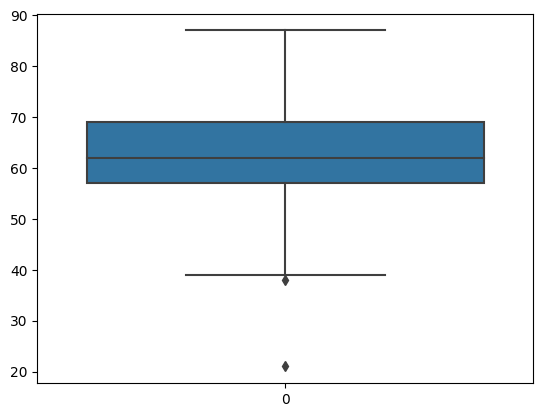

In [ ]:
import seaborn as sna
sna.boxplot(dataset["AGE"])

Removing the Outliers

In [ ]:
Q1=dataset["AGE"].quantile(0.25)
Q3=dataset["AGE"].quantile(0.75)
IQR=Q3-Q1
Lower_limit=Q1-(1.5*IQR)
Upper_limit=Q3+(1.5*IQR)
dataset.loc[dataset.AGE>Upper_limit,"AGE"]=Upper_limit
dataset.loc[dataset.AGE<Lower_limit,"AGE"]=Lower_limit

<Axes: >

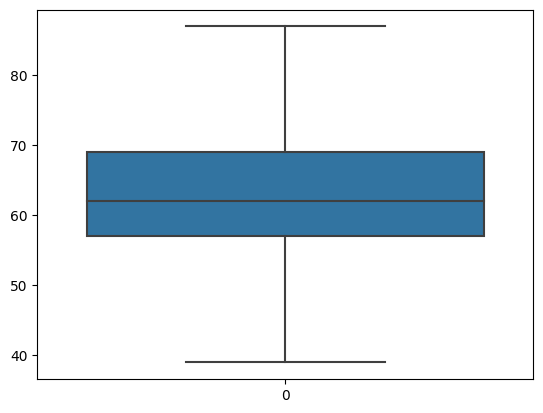

In [ ]:
sna.boxplot(dataset["AGE"])

KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_Classifier=KNeighborsClassifier(n_neighbors=7)
KNN_Classifier.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=7)

Accuracy

In [ ]:
print("Accuracy=",KNN_Classifier.score(X_test,Y_test))

Accuracy= 0.8387096774193549


Score

In [ ]:
KNN_Classifier.score(X_train,Y_train)

0.8947368421052632

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
LR_Classifier = LogisticRegression(random_state = 0)
LR_Classifier.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [ ]:
Y_pred = LR_Classifier.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1),Y_test.reshape(len(Y_test),1)),1))

[[1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]]


Accuracy

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.8870967741935484